# 3. Procesamiento básico de datos de acelerometría


[Activity Recognition from Single Chest-Mounted Accelerometer](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer)

 - The dataset collects data from a wearable accelerometer mounted on the chest 
 - Sampling frequency of the accelerometer: 52 Hz 
 - Accelerometer Data are Uncalibrated 
 - Number of Participants: 15 
 - Number of Activities: 7 
 - Data Format: CSV

In [2]:
import os
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

In [18]:
cnames = ['id','x_axes','y_axes','z_axes','task']
x      = pd.read_csv( '../../data/chest-accelerometer-1.csv',names=cnames )

In [14]:
x.head()

id  x_axes  y_axes  z_axes  task
0  0.0    1502    2215    2153     1
1  1.0    1667    2072    2047     1
2  2.0    1611    1957    1906     1
3  3.0    1601    1939    1831     1
4  4.0    1643    1965    1879     1

In [15]:
print x.values.shape

(162501, 5)


In [14]:
SR  = 52.
DR  = x.values.shape[0]/SR

print DR

3125.01923077


In [41]:
SLC  = np.array( [20,50] )
t    = np.linspace( SLC[0],SLC[1],int(np.diff(SLC)*SR) )
SLC  = SLC*int(SR)

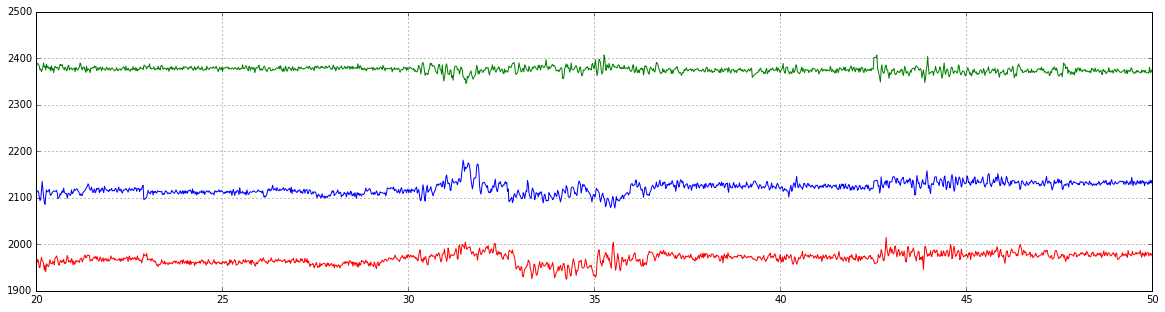

In [43]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.plot( t,x.x_axes[SLC[0]:SLC[1]],'r' )
plt.plot( t,x.y_axes[SLC[0]:SLC[1]],'g' )
plt.plot( t,x.z_axes[SLC[0]:SLC[1]],'b' )
plt.show()

In [13]:
SLC  = np.array( [20,50] )
t    = np.linspace( SLC[0],SLC[1],int(np.diff(SLC)*SR) )
SLC  = SLC*int(SR)

plt.figure(figsize=(20,5))
plt.grid(True)
plt.plot( x.x_axes[SLC[0]:SLC[1]].values,'r' )
plt.plot( x.y_axes[SLC[0]:SLC[1]].values,'g' )
plt.plot( x.z_axes[SLC[0]:SLC[1]].values,'b' )

SLC  = np.array( [500,550] )
t    = np.linspace( SLC[0],SLC[1],int(np.diff(SLC)*SR) )
SLC  = SLC*int(SR)

plt.plot( x.x_axes[SLC[0]:SLC[1]].values,'r' )
plt.plot( x.y_axes[SLC[0]:SLC[1]].values,'g' )
plt.plot( x.z_axes[SLC[0]:SLC[1]].values,'b' )

plt.show()

NameError: name 'SR' is not defined

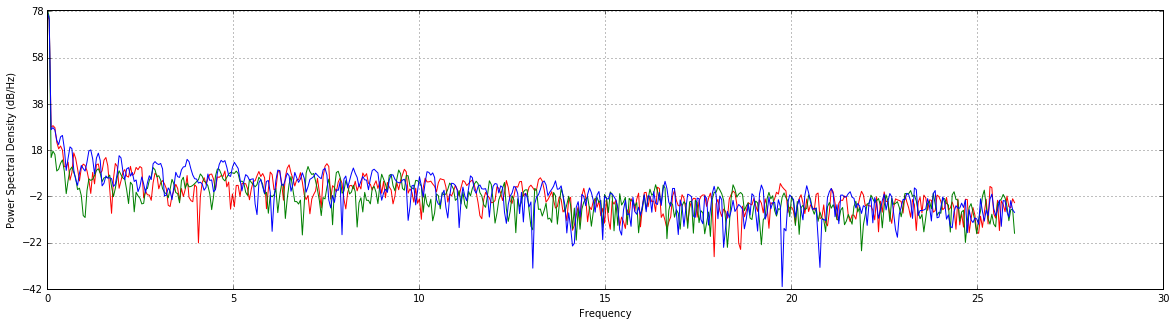

In [61]:
SLC  = np.array( [20,50] )
t    = np.linspace( SLC[0],SLC[1],int(np.diff(SLC)*SR) )
SLC  = SLC*int(SR)

plt.figure(figsize=(20,5))
plt.grid(True)
plt.psd( x.x_axes[SLC[0]:SLC[1]].values,color='r',Fs=SR,NFFT=1024 )
plt.psd( x.y_axes[SLC[0]:SLC[1]].values,color='g',Fs=SR,NFFT=1024 )
plt.psd( x.z_axes[SLC[0]:SLC[1]].values,color='b',Fs=SR,NFFT=1024 )
plt.show()

In [57]:
x.x_axes[SLC[0]:SLC[1]].values

array([1960, 1961, 1956, ..., 1970, 1967, 1969])

In [5]:
from scipy import signal as sn

In [28]:
wc  = 2*np.array( [1.,20.] )/SR
b,a = sn.butter(5,wc,'band')

In [29]:
SLC  = np.array( [20,50] )
t    = np.linspace( SLC[0],SLC[1],int(np.diff(SLC)*SR) )
SLC  = SLC*int(SR)

x_data = x.x_axes[SLC[0]:SLC[1]].values
x_filt = sn.filtfilt(b,a,x_data)

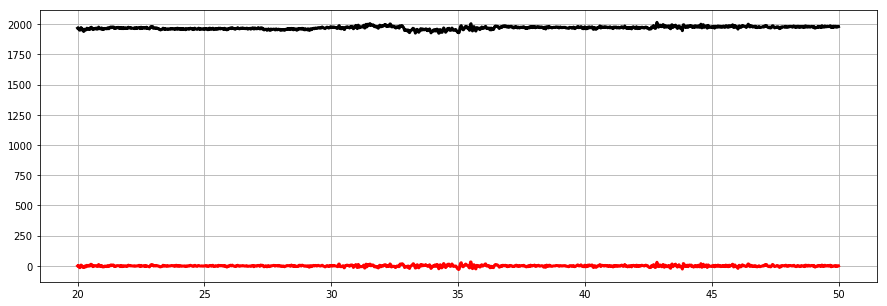

In [30]:
plt.figure(figsize=(15,5))
plt.plot( t,x_data,'k',linewidth=3)
plt.plot( t,x_filt,'r',linewidth=3)
plt.grid(True)
plt.show()

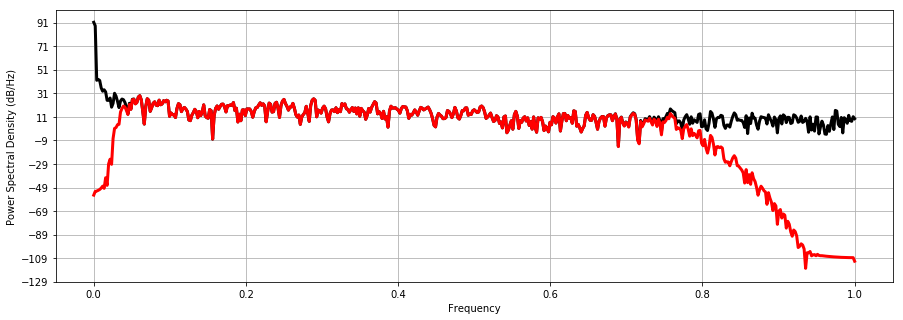

In [31]:
plt.figure(figsize=(15,5))
plt.psd( x_data,NFFT=1024,color='k',linewidth=3)
plt.psd( x_filt,NFFT=1024,color='r',linewidth=3)
plt.grid(True)
plt.show()

[Smartphone-Based Recognition of Human Activities and Postural Transitions Data Set ](https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions)